### Activity 9: Extracting the Top 100 eBooks from Gutenberg

In [79]:
"""
Santosh Omprakash
"""

'\nSantosh Omprakash\n'

In [80]:
# Import the necessary libraries, including regex and beautifulsoup
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [81]:
# Check the SSL certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [82]:
# Read the HTML form the URL
top100eb = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(top100eb)

In [83]:
# Write a small function to check the status of the web request
def web_status(r):
    if r.status_code == 200:
        print("Web request successful")
        return 1
    else:
        print("Web request failed")
        return -1

In [84]:
# Check web request status
web_status(response)

Web request successful


1

In [85]:
# Decode the response and pass this on to BeautifulSoup for the HTML parsing
resp_cont = response.content.decode(response.encoding)
soup = BeautifulSoup(resp_cont, 'html.parser')

In [86]:
# Find all the href tags and store them in the list of links. Check what the list looks like - print the first 30 elements
link_list = []

# Find href tags and store in link_list
for link in soup.find_all("a"):
    link_list.append(link.get("href"))

In [87]:
link_list

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/25525',
 '/ebooks/1635',
 '/ebooks/1661',
 '/ebooks/2701',
 '/ebooks/74',
 '/ebooks/1952',
 '/ebooks/98',
 '/ebooks/62740',
 '/ebooks/46',
 '/ebooks/76',
 '/ebooks/1080',
 '/ebooks/84',
 '/ebooks/5200',
 '/ebooks/514',
 '/ebooks/1184',
 '/ebooks/2591',
 '/ebooks/205',
 '/ebooks/2600',
 '/ebooks/2542',
 '/ebooks/62739',
 '/ebooks/120',
 '/ebooks/62741',
 '/ebooks/174',
 '/ebooks/4300',
 '/ebooks/345',
 '/ebooks/1232',
 '/ebook

In [88]:
# Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 ebooks
# Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in
# the link href string. Use the findall method.
book_num = []

# Numbers 19 to 119 have the top 100 ebooks
for i in range(19, 119):
    link = link_list[i]
    link = link.strip()
    n = re.findall("[0-9]+", link)
    if len(n) == 1:
        book_num.append(int(n[0]))

In [89]:
print("File numbers for top 100 ebooks are:")
print(book_num)

File numbers for top 100 ebooks are:
[1342, 11, 25525, 1635, 1661, 2701, 74, 1952, 98, 62740, 46, 76, 1080, 84, 5200, 514, 1184, 2591, 205, 2600, 2542, 62739, 120, 62741, 174, 4300, 345, 1232, 45, 16, 158, 408, 43, 16328, 62738, 844, 1260, 5740, 1497, 58975, 6130, 1727, 1400, 58585, 2554, 42108, 203, 730, 36, 19033, 55, 147, 6087, 768, 62734, 219, 135, 1998, 28054, 244, 996, 902, 376, 27827, 113, 4363, 25717, 1019, 1399, 2814, 148, 766, 33283, 215, 62745, 8800, 2680, 3600, 2852, 160, 161, 25344, 1250, 62744, 2500, 28860, 100, 3825, 3207, 236, 39353, 62742, 62730, 12, 1228, 521, 62729, 62731, 863, 30254]


In [90]:
# What does the soup object's text look like? Use the .text method and print only the first 2,000 characters
print(soup.text[:2000])










      if (top != self) {
        top.location.replace ('http://www.gutenberg.org');
        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');
      }
    
 
Top 100 - Project Gutenberg








Online Book Catalog
=> 



 Book  Search
-- Recent  Books
-- Top  100
-- Offline Catalogs
-- My Bookmarks


Main Page




Project Gutenberg needs your donation! 
        More Info








Did you know that you can help us produce ebooks
by proof-reading just one page a day?
Go to: Distributed Proofreaders



Top 100


To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not cons

#### There are many blank spaces which can be ignored.

In [91]:
# Search the extracted text(using a regular expression) from the soup object to find the names of the top 100 eBooks
# (yesterday's ranking)
temp_list = []

In [92]:
# Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It
# splits the lines of text of the soup object
startindx = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [93]:
# Loop 1-100 to add the strings of the next 100 lines to this temporary list
# Search extracted text to find top 100 ebooks
for i in range(100):
    temp_list.append(soup.text.splitlines()[startindx+2+i])

temp_list

['Pride and Prejudice by Jane Austen (1373)',
 "Alice's Adventures in Wonderland by Lewis Carroll (964)",
 'The Works of Edgar Allan Poe, The Raven Edition by Edgar Allan Poe (744)',
 'Ion by Plato (685)',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle (662)',
 'Moby Dick; Or, The Whale by Herman Melville (648)',
 'The Adventures of Tom Sawyer by Mark Twain (561)',
 'The Yellow Wallpaper by Charlotte Perkins Gilman (494)',
 'A Tale of Two Cities by Charles Dickens (464)',
 'Walker of the Secret Service by Melville Davisson Post (437)',
 'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens (433)',
 'Adventures of Huckleberry Finn by Mark Twain (431)',
 'A Modest Proposal by Jonathan Swift (426)',
 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (424)',
 'Metamorphosis by Franz Kafka (422)',
 'Little Women by Louisa May Alcott (415)',
 'The Count of Monte Cristo, Illustrated by Alexandre Dumas (406)',
 "Grimms' Fairy Tales by

In [94]:
# Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to
# find the indices and use them
titl_list = []
for i in range(100):
    id1,id2 = re.match('^[a-zA-Z ]*',temp_list[i]).span()
    titl_list.append(temp_list[i][id1:id2])
    
titl_list

['Pride and Prejudice by Jane Austen ',
 'Alice',
 'The Works of Edgar Allan Poe',
 'Ion by Plato ',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'Moby Dick',
 'The Adventures of Tom Sawyer by Mark Twain ',
 'The Yellow Wallpaper by Charlotte Perkins Gilman ',
 'A Tale of Two Cities by Charles Dickens ',
 'Walker of the Secret Service by Melville Davisson Post ',
 'A Christmas Carol in Prose',
 'Adventures of Huckleberry Finn by Mark Twain ',
 'A Modest Proposal by Jonathan Swift ',
 'Frankenstein',
 'Metamorphosis by Franz Kafka ',
 'Little Women by Louisa May Alcott ',
 'The Count of Monte Cristo',
 'Grimms',
 'Walden',
 'War and Peace by graf Leo Tolstoy ',
 'Et dukkehjem',
 'King Leopold',
 'Treasure Island by Robert Louis Stevenson ',
 'The Jim Crow Car',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'Ulysses by James Joyce ',
 'Dracula by Bram Stoker ',
 'Il Principe',
 'Anne of Green Gables by L',
 'Peter Pan by J',
 'Emma by Jane Austen ',
 'The Souls of Blac

### Activity 10: Building your own Movie Databse by Reading the API

In [95]:
# Import necessary libraries
import json

In [96]:
# Key is stored in OMDB_APIkey.json file

In [97]:
# Load the secret API key from a JSON file stored in the same folder in a variable by using json.loads
# Open OMDb_APIkey.json file
with open('OMDb_APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['consumer_key']

In [98]:
# Assign the OMDb portal as a string to a variable
serviceurl = 'http://www.omdbapi.com/?'

In [99]:
# Create a variable called apikey with last port of URL
apikey = '&apikey='+omdbapi

In [100]:
# Write utility function to print movie data from a JSON file
def print_json(jsondata):
    listkey = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 
               'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for k in listkey:
        if k in list(jsondata.keys()):
            print(f"{k}: {jsondata[k]}")

In [101]:
# Write utility function to download a poster
def saveposter(jsondata):
    import os
    title = jsondata['Title']
    poster_url = jsondata['Poster']
    
    # Splits poster ur by '.' and picks last string
    poster_file_extension = poster_url.split('.')[-1]
    
    # Reads image file
    poster_data = urllib.request.urlopen(poster_url).read()
    
    savelocation = os.getcwd()+'\\'+'Posters'+'\\'

    # Creates new directory if directory doesn't exist
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        
    filename = savelocation+str(title)+'.'+poster_file_extension
    f = open(filename, 'wb')
    f.write(poster_data)
    f.close()

In [102]:
# Write a utility function to search movie by its name
def searchmovie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now...')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        jsondata = json.loads(data)
        print(jsondata)
        if jsondata['Response'] == 'True':
            print_json(jsondata)
            
            if jsondata['Poster'] != 'N/A':
                saveposter(jsondata)
        else:
            print("Error encountered: ", jsondata['Error'])
    except urllib.error.URLError as e:
        print(f"Error: {e.reason}")

In [103]:
# Test searchmovie by entering titanic
searchmovie("Titanic")

Retrieving the data of "Titanic" now...
http://www.omdbapi.com/?t=Titanic&apikey=6d826f9a
{'Title': 'Titanic', 'Year': '1997', 'Rated': 'PG-13', 'Released': '19 Dec 1997', 'Runtime': '194 min', 'Genre': 'Drama, Romance', 'Director': 'James Cameron', 'Writer': 'James Cameron', 'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates', 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.', 'Language': 'English, Swedish, Italian, French', 'Country': 'USA, Mexico, Australia, Canada', 'Awards': 'Won 11 Oscars. Another 113 wins & 83 nominations.', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}], 'Metascore': '75', 'imdbRating': '7.8', 'imdbVotes': '1,

In [104]:
# Test searchmovie function by entering "Random_error"
searchmovie("Random_error")

Retrieving the data of "Random_error" now...
http://www.omdbapi.com/?t=Random_error&apikey=6d826f9a
{'Response': 'False', 'Error': 'Movie not found!'}
Error encountered:  Movie not found!


### Connect to the Twitter API and do a simple data pull

In [105]:
# Load necessary libraries
import twitter

In [106]:
twitterapi = twitter.Api(consumer_key='qsdiE31g6WIgpIQFFeFNITV5X',
    consumer_secret='BPjow5dbWcwVC6sxFxBK9kIlgz7UshrUHf1jWyJS6xG4h7mJkv',
    access_token_key='205262777-gk0JuPDGvI9nOaYVbqVaHLjqG9Cjvd8jXibmTH2G',
    access_token_secret='vrYy82XkFk7l4bdURvPRfl7kl4uC90C6fnH9Q30Cu2LmG')

In [107]:
print(twitterapi.VerifyCredentials())

{"created_at": "Wed Oct 20 13:40:36 +0000 2010", "default_profile_image": true, "followers_count": 16, "friends_count": 13, "id": 205262777, "id_str": "205262777", "listed_count": 1, "name": "Santosh kumar O", "profile_background_color": "642D8B", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme10/bg.gif", "profile_background_tile": true, "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "FF0000", "profile_sidebar_border_color": "65B0DA", "profile_sidebar_fill_color": "7AC3EE", "profile_text_color": "3D1957", "profile_use_background_image": true, "screen_name": "osantosh"}


In [108]:
twitterapi.GetSearch(term='Bellevue University', since=2020-7-1, count=10)

[Status(ID=1286767205888270336, ScreenName=anakincrywalker, Created=Fri Jul 24 20:56:23 +0000 2020, Text='this bellevue university ad!! https://t.co/frNdibGjlp'),
 Status(ID=1286711064302948352, ScreenName=BraysonMueller, Created=Fri Jul 24 17:13:18 +0000 2020, Text='RT @zaneleyden: Excited to announce my commitment to further my academic and athletic career at Bellevue University. Huge thank you to my f…'),
 Status(ID=1286708932443021312, ScreenName=KalliKroeker, Created=Fri Jul 24 17:04:50 +0000 2020, Text='RT @zaneleyden: Excited to announce my commitment to further my academic and athletic career at Bellevue University. Huge thank you to my f…'),
 Status(ID=1286707957963591686, ScreenName=MoellerCrew, Created=Fri Jul 24 17:00:57 +0000 2020, Text='RT @zaneleyden: Excited to announce my commitment to further my academic and athletic career at Bellevue University. Huge thank you to my f…'),
 Status(ID=1286693754104053763, ScreenName=AaronKlenda, Created=Fri Jul 24 16:04:31 +0000 2020,

In [109]:
twitterapi.GetSearch(term='Data Science', since=2020-7-1, count=10)

[Status(ID=1287006663040475137, ScreenName=NPR, Created=Sat Jul 25 12:47:54 +0000 2020, Text='Researchers analyzed the data from every study on the protective effect of masks. \n\nTheir bottom-line estimate: If… https://t.co/Smg7wjuZFq'),
 Status(ID=1287159191665168384, ScreenName=RepAndyBiggsAZ, Created=Sat Jul 25 22:54:00 +0000 2020, Text="If you're following the science &amp; data on reopening schools, you can clearly see that schools across the country CA… https://t.co/BiqtC83VHw"),
 Status(ID=1287032287234859009, ScreenName=devisridhar, Created=Sat Jul 25 14:29:43 +0000 2020, Text='Immunity a big puzzle- reactivation? reinfection? I’m not sure. If you’re listening to the news, check if they are… https://t.co/SIlz5uaprh'),
 Status(ID=1287522246781800450, ScreenName=nlognbot, Created=Sun Jul 26 22:56:39 +0000 2020, Text='RT @DavideCamera: Data Science is 80% Data Management Skills + 10% Algos Skills + 10% Lucky 😁🤟 #BigData #Analytics #DataScience #AI #IoT #P…'),
 Status(ID=128752223

### Using one of the datasets provided, choose 3 of the following visualizations to complete.

In [110]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
# Read January 8 to February 7 2019 core trends survey file
coretrend_survey = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

In [112]:
coretrend_survey.head(10)

,respid,sample,comp,int_date,lang,cregion,state,density,sfips,usr,...,inc,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
0,4,1,1,190108,1,3,37,2,37069,S,...,3,2,,2,2,1,,,1.143827,
1,7,1,1,190108,1,2,39,3,39025,S,...,8,1,,2,2,1,,,0.611493,
2,9,1,1,190108,1,1,34,4,34025,S,...,7,1,,2,2,1,,,0.424797,
3,10,1,1,190108,1,2,18,3,18039,S,...,6,3,2,2,2,1,,,1.323562,
4,11,1,1,190114,1,2,26,2,26027,S,...,7,3,1,2,2,1,,,0.639452,
5,13,1,1,190108,1,1,34,5,34017,U,...,1,3,1,1,,2,,,1.913620,
6,14,1,1,190108,1,1,36,5,36119,U,...,4,3,2,2,2,1,,,1.330219,
7,15,1,1,190115,1,3,47,2,47073,S,...,99,4,9,1,,1,,,0.833356,
8,16,1,1,190108,1,2,26,1,26033,R,...,7,1,,2,2,1,,,0.669629,
9,17,1,1,190108,1,2,26,3,26065,S,...,9,1,,3,3,1,,,0.646306,


In [113]:
# sex 1 = Male and 2 = Female
surv_male = coretrend_survey.loc[coretrend_survey['sex'] == 1]
surv_male

,respid,sample,comp,int_date,lang,cregion,state,density,sfips,usr,...,inc,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
1,7,1,1,190108,1,2,39,3,39025,S,...,8,1,,2,2,1,,,0.611493,
4,11,1,1,190114,1,2,26,2,26027,S,...,7,3,1,2,2,1,,,0.639452,
6,14,1,1,190108,1,1,36,5,36119,U,...,4,3,2,2,2,1,,,1.330219,
7,15,1,1,190115,1,3,47,2,47073,S,...,99,4,9,1,,1,,,0.833356,
9,17,1,1,190108,1,2,26,3,26065,S,...,9,1,,3,3,1,,,0.646306,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,300193,2,1,190203,1,4,35,1,35029,R,...,3,1,,1,,,,2,0.366035,.4145405
1497,300194,2,1,190203,1,4,6,2,6085,S,...,4,4,2,2,2,,,1,1.057235,1.4971284
1498,300195,2,1,190203,1,4,53,1,53025,R,...,9,9,9,5,5,,,1,0.736451,.6277294
1499,300196,2,1,190204,1,1,36,5,36061,U,...,8,4,2,5,4,,,1,0.622202,.465119


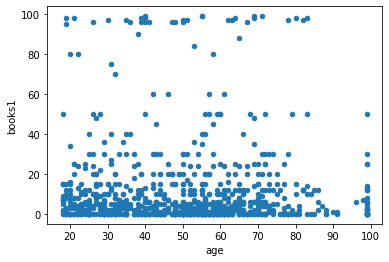

In [114]:
# Scatter plot
# During the past 12 months, about how many BOOKS did you read either all or part of the way through? 
surv_male.plot(x='age', y='books1', kind='scatter')
plt.savefig('Week7and8_scatterplot.pdf')

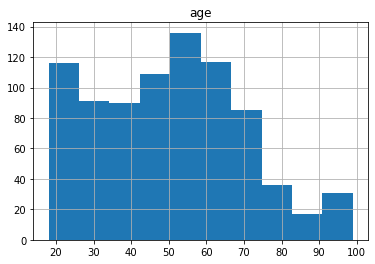

In [115]:
# Histogram
# 1 - Married
# 2 - Living with a partner
# 3 - Divorced
# 4 - Separated
# 5 - Widowed
# 6 - Never been married
# 8 - (VOL.) Don't know
# 9 - (VOL.) Refused

surv_male.hist(column='age')
plt.savefig('Week7and8_histogram.pdf')

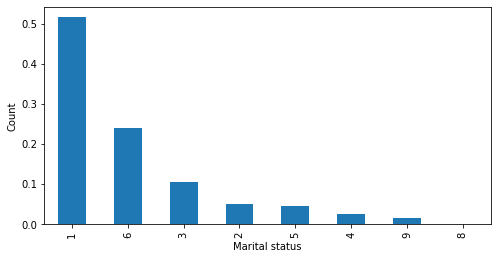

In [116]:
# Bar chart
plt.figure(figsize=(8,4))
surv_male["marital"].value_counts(normalize=True).plot.bar()
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.savefig('Week7and8_barchart.pdf')